In [13]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
digits = load_digits()

In [14]:
x = digits['data']
x = x/16
x.shape

(1797, 64)

In [15]:
y = digits['target']

In [16]:
x_new = []
y_new = []
for i in range(0,x.shape[0]):
    for j in range(0,x.shape[1]):
        if x[i][j] > 0.5:
            x[i][j] = 1
        else:
            x[i][j] = 0
    if y[i] == 2 or y[i] == 3 or y[i] == 4:
        x_new.append(x[i])
        y_new.append(y[i])
x = np.array(x_new)
y = np.array(y_new)

In [17]:
p = np.random.rand(3,64)
pi = np.random.rand(3)

In [18]:
def Prob(x,mu):
    p = 1
    for i in range(0,x.shape[0]):
        p *= (mu[i] ** x[i])*(1- mu[i])**(1-x[i])
    return p

In [19]:
def E(p,pi):
    gamma = {}
    for i in range(0,x.shape[0]):
        ga = {}
        denom = 0
        for j in range(0,pi.shape[0]):
            denom += pi[j] * Prob(x[i],p[j])

        for j in range(0,pi.shape[0]):
            ga[j] = pi[j] * Prob(x[i], p[j])
            ga[j] /= denom
        gamma[i] = ga
    return gamma

In [20]:
def M(gamma):
    p = np.random.rand(3,64)
    pi = np.random.rand(3)
    for j in range(0,pi.shape[0]):
        gammaSum = 0
        for i in range(0,x.shape[0]):
            gammaSum += gamma[i][j]
        pi[j] = gammaSum / x.shape[0]
    
    for j in range(0,p.shape[0]):
        gammaSum = np.zeros(x.shape[1])
        gammaS = 0
        for i in range(0,x.shape[0]):
            gammaSum += gamma[i][j] * x[i]
            gammaS  += gamma[i][j]
        p[j] = gammaSum / gammaS
    
    return p, pi

In [21]:
for i in range(0,10):
    gamma = E(p,pi)
    p, pi  = M(gamma)

In [22]:
pi

array([0.26738121, 0.40352212, 0.32909667])

In [23]:
p

array([[0.00000000e+000, 0.00000000e+000, 7.24963828e-001,
        9.92987160e-001, 4.64004230e-001, 2.81445984e-003,
        2.70546355e-099, 0.00000000e+000, 0.00000000e+000,
        2.63401439e-001, 9.88565221e-001, 8.63651098e-001,
        8.47911474e-001, 1.11047905e-001, 8.52799141e-031,
        0.00000000e+000, 0.00000000e+000, 3.06355975e-001,
        5.43895843e-001, 1.91617276e-001, 8.86461276e-001,
        1.52316978e-001, 1.77788593e-032, 0.00000000e+000,
        0.00000000e+000, 2.76682476e-002, 8.32973161e-002,
        3.02872163e-001, 9.05253360e-001, 6.32395195e-002,
        4.54583672e-041, 0.00000000e+000, 0.00000000e+000,
        5.08330482e-043, 3.47569650e-002, 6.64800873e-001,
        6.76230325e-001, 3.87916535e-002, 1.14920588e-012,
        0.00000000e+000, 0.00000000e+000, 4.84353890e-032,
        2.82675173e-001, 7.92768961e-001, 3.56123654e-001,
        6.32770852e-002, 2.12333215e-002, 0.00000000e+000,
        0.00000000e+000, 2.76711449e-002, 8.15910209e-00

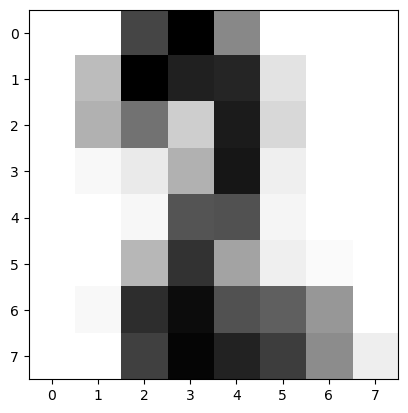

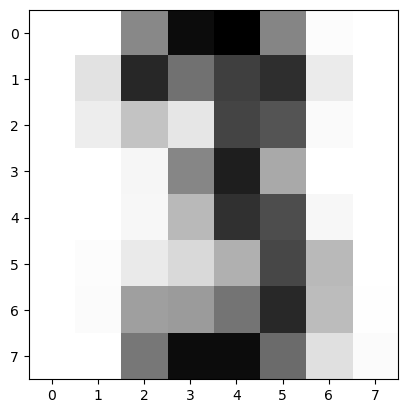

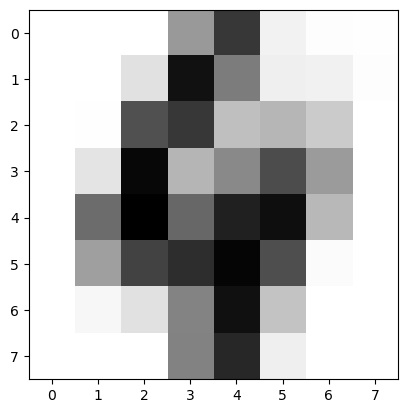

In [24]:
for mean in p:
    plt.imshow(mean.reshape(8,8), cmap = plt.cm.gray_r, interpolation='nearest')
    plt.show()